In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, GaussianNoise
from tensorflow.keras.layers import MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train/255
X_test = X_test/255

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [4]:
# Define input shape of the images
input_shape = (28, 28, 1)

# Define the encoder
input_img = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = GaussianNoise(.5)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name="out")(x)
# Define the decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 gaussian_noise (GaussianNo  (None, 28, 28, 16)        0         
 ise)                                                            
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0     

In [6]:
history = autoencoder.fit(X_train, X_train, epochs=20, verbose=1, batch_size=256, shuffle=True,
               validation_data = (X_test, X_test))

Epoch 1/20
235/235 [==============================] - 91s 379ms/step - loss: 0.3049 - accuracy: 0.7946 - val_loss: 0.2864 - val_accuracy: 0.7684
Epoch 2/20
235/235 [==============================] - 87s 370ms/step - loss: 0.1805 - accuracy: 0.7942 - val_loss: 0.2003 - val_accuracy: 0.7717
Epoch 3/20
235/235 [==============================] - 90s 383ms/step - loss: 0.1540 - accuracy: 0.8009 - val_loss: 0.1970 - val_accuracy: 0.7704
Epoch 4/20
235/235 [==============================] - 87s 369ms/step - loss: 0.1428 - accuracy: 0.8040 - val_loss: 0.1953 - val_accuracy: 0.7732
Epoch 5/20
235/235 [==============================] - 87s 371ms/step - loss: 0.1357 - accuracy: 0.8059 - val_loss: 0.1812 - val_accuracy: 0.7816
Epoch 6/20
235/235 [==============================] - 88s 373ms/step - loss: 0.1307 - accuracy: 0.8070 - val_loss: 0.1877 - val_accuracy: 0.7785
Epoch 7/20
235/235 [==============================] - 86s 368ms/step - loss: 0.1271 - accuracy: 0.8078 - val_loss: 0.1798 - val_ac

In [7]:
reconstructed = autoencoder.predict(X_test)

313/313 [==============================] - 4s 11ms/step


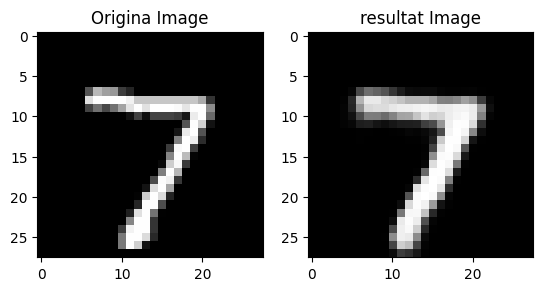

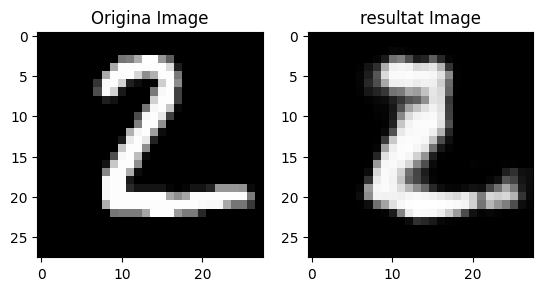

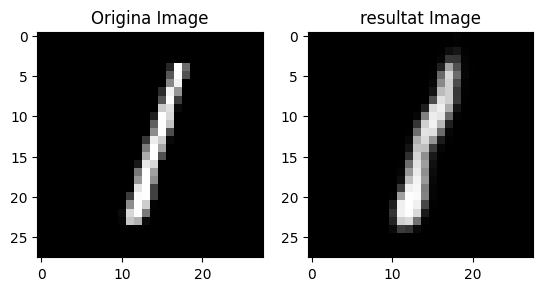

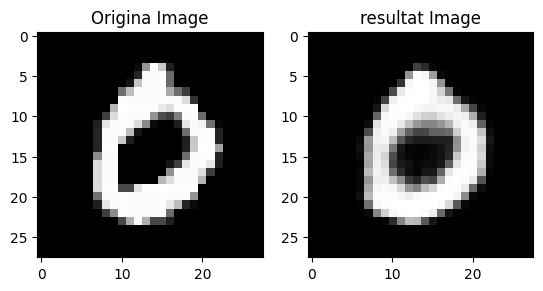

In [9]:
for i in range(4):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(X_test[i], cmap='gray')
    ax[1].imshow(reconstructed[i], cmap='gray')
    ax[0].set_title("Origina Image")
    ax[1].set_title("resultat Image")
    plt.show()